## Python statistics essential training - 03_04_twovariables

In [1]:
#meta 4/7/2020
#Ch3. Visualizing and Describing Data
#my code and solution code bits

In [2]:
import numpy as np
import scipy.stats
import pandas as pd

In [3]:
import matplotlib
import matplotlib.pyplot as pp

from IPython import display
from ipywidgets import interact, widgets

%matplotlib inline

In [4]:
import re
import mailbox
import csv

# Plots of 2 Quantitative Variables
To hypothesize and inspect possible relations between them. Do they rise and fall together, is it possible that the change in one, is causing the change in the other? Formally, we say that we would like to explain the variation in a response variable as a function of the variation in an explanatory variable.

# Gapminder
Identifying and explaining global trends in data with the late statistician and public health expert Hans Rosling.

- book Factfulness  
- website gapminder.org

## 0. Load Data
Basic facts about life in countries:  
the population, the expected lifetime (the average age of death for all born), the percentage of children surviving to age five, the average number of babies per woman, the gross national product divided by population, and the income available (avg) to each citizen each day (last two columns are given in 2011 equivalent dollars).

In [5]:
gapminder = pd.read_csv('lynda_data/gapminder.csv')
gapminder.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14740 entries, 0 to 14739
Data columns (total 9 columns):
country             14740 non-null object
year                14740 non-null int64
region              14740 non-null object
population          14740 non-null float64
life_expectancy     14740 non-null float64
age5_surviving      14740 non-null float64
babies_per_woman    14740 non-null float64
gdp_per_capita      14740 non-null float64
gdp_per_day         14740 non-null float64
dtypes: float64(6), int64(1), object(2)
memory usage: 1.0+ MB


## 1. Plot

### 1.1 Time Series
is to plot a variable using the date as the explanatory variable. 
i.e. look at a population of Italy. 

In [12]:
italy = gapminder.query('country == "Italy"')
italy.head()

,country,year,region,population,life_expectancy,age5_surviving,babies_per_woman,gdp_per_capita,gdp_per_day
6397,Italy,1800,Europe,18822234.0,29.69,54.259,5.47,2225.0,6.091718
6398,Italy,1810,Europe,19491674.0,29.69,54.395,5.47,2371.0,6.491444
6399,Italy,1820,Europe,20341608.0,29.69,54.531,5.47,2474.0,6.773443
6400,Italy,1830,Europe,21529667.0,29.69,54.667,5.47,2471.0,6.765229
6401,Italy,1840,Europe,22956667.0,29.69,54.804,5.47,2524.0,6.910335


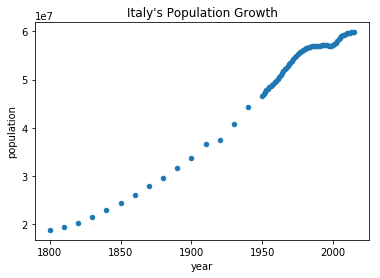

In [16]:
italy.plot.scatter('year', 'population', title = "Italy's Population Growth")


We see that in this dataset, points become denser after 1950. The slope of the plot doesn't change very much, something like this would be very different for China or India.

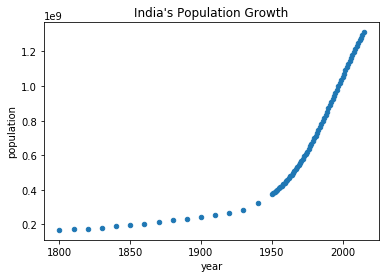

In [17]:
gapminder.query('country == "India"').plot.scatter("year","population", title = "India's Population Growth")

Going back to Italy, let's look at income per person per day in 2011 equivalent dollars, again, as a time series. As Rosling teaches us, let's look at the logarithm of income. 


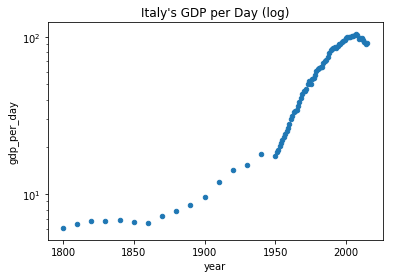

In [22]:
italy.plot.scatter('year', 'gdp_per_day', logy=True, title = "Italy's GDP per Day (log)")


Clearly the last 20 years have been disappointing. 

## 1.2 Scatter Plots
We can also plot log income against the variable related to the quality of life, such as, life expectancy.

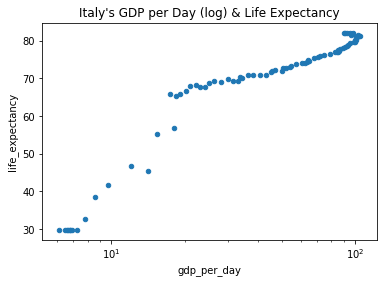

In [25]:
italy.plot.scatter('gdp_per_day', 'life_expectancy',  logx=True, title = "Italy's GDP per Day (log) & Life Expectancy")

Even if income has decreased of recent, life expectancy has continued to grow. 

To provide more context for this plot, we can mark decades by changing the size of the dots.

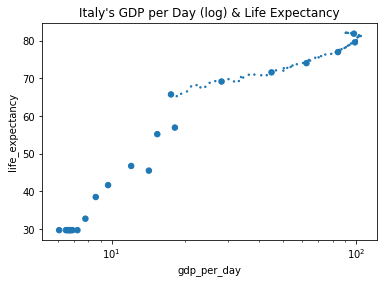

In [28]:
#create an array size by using the function numpy.where
#where the year is an integer multiple of ten, I would use a large dot, or a small dot otherwise. 
size = np.where(italy.year % 10 == 0,30,2)

italy.plot.scatter("gdp_per_day", "life_expectancy", logx=True, s=size, title = "Italy's GDP per Day (log) & Life Expectancy")

## 1.3 Compare 2 Countries
Let's throw in also the US. 

The progress of the two countries is similar, with the US consistently richer. But also little less healthy. How about China and the US? It takes a very small change to the code. Now, red is probably appropriate.

To understand a cluster of points at the bottom left, it's best to connect this kind of plot. Which we can do by adding a line plot on top of it. Let's see how to do it. We'll down select the data to China only. And for once instead of query, I'm using the Numpy style fancy indexing. And then I'll plot the line.

I also need a little Matplotlib trick to put the two plots together. I need to save the object return by scatter, which is a Matplotlib axis object, and pass it to line. So the precipitous drop in life expectancy happens in 1959, with a Great Chinese Famine, when drought and poor agricultural policies led to the death of tens of millions of people. It's striking to see it reflected in just a simple plot such as this.

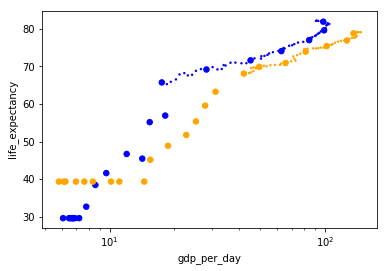

In [29]:
data = gapminder.query('(country == "Italy") or (country == "United States")')

size = np.where(data.year % 10 == 0,30,2)
color = np.where(data.country == 'Italy','blue','orange')

data.plot.scatter("gdp_per_day", "life_expectancy", logx=True, s=size, c=color)

The progress of the two countries is similar, with the US consistently richer. But also little less healthy. 

#### How about China and the US? 

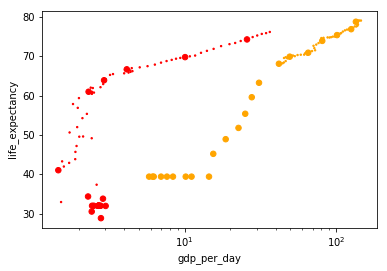

In [31]:
data = gapminder.query('(country == "China") or (country == "United States")')

size = np.where(data.year % 10 == 0,30,2)
color = np.where(data.country == 'China','red','orange')

data.plot.scatter("gdp_per_day", "life_expectancy", logx=True, s=size, c=color)

To understand a cluster of points at the bottom left, it's best to connect this kind of plot. Which we can do by adding a line plot on top of it.

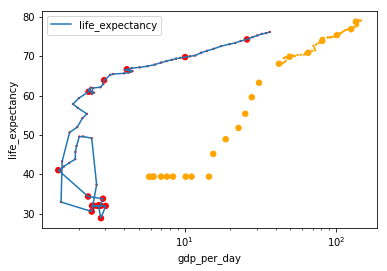

In [33]:
data = gapminder.query('(country == "China") or (country == "United States")')

size = np.where(data.year % 10 == 0,30,2)
color = np.where(data.country == 'China','red','orange')

#select the data to China only using Numpy style indexing. plot the line.
#also need a little Matplotlib trick to put the two plots together:
# need to save the object returned by scatter, which is a Matplotlib axis object, and pass it to line.
ax = data.plot.scatter("gdp_per_day", "life_expectancy", logx=True, s=size, c=color)
data[data.country == 'China'].plot.line(x='gdp_per_day',y='life_expectancy',ax=ax)

So the precipitous drop in life expectancy happens in 1959, with a Great Chinese Famine, when drought and poor agricultural policies led to the death of tens of millions of people. It's striking to see it reflected in just a simple plot such as this.